In [1]:
# import seaborn and matplotlib - data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# import pandas - data processing
import pandas as pd 
import os

In [2]:
data = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [3]:
# first look at the data
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [4]:
# 231 features/columns and 1925 rows
print(data.shape)

print("This dataset has ", data.shape[0], " rows and ", data.shape[1], " columns.")

(1925, 231)
This dataset has  1925  rows and  231  columns.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [6]:
data['ICU'].value_counts()

0    1410
1     515
Name: ICU, dtype: int64

In [7]:
def print_na(df):
    for i in range(df.isna().sum().shape[0]):
        f = df.isna().sum().index[i]
        v = df.isna().sum()[i]
        print(f, " : ", v)

In [8]:
# Null / NA values in our dataset
print_na(data)

PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
DISEASE GROUPING 1  :  5
DISEASE GROUPING 2  :  5
DISEASE GROUPING 3  :  5
DISEASE GROUPING 4  :  5
DISEASE GROUPING 5  :  5
DISEASE GROUPING 6  :  5
HTN  :  5
IMMUNOCOMPROMISED  :  5
OTHER  :  5
ALBUMIN_MEDIAN  :  1104
ALBUMIN_MEAN  :  1104
ALBUMIN_MIN  :  1104
ALBUMIN_MAX  :  1104
ALBUMIN_DIFF  :  1104
BE_ARTERIAL_MEDIAN  :  1104
BE_ARTERIAL_MEAN  :  1104
BE_ARTERIAL_MIN  :  1104
BE_ARTERIAL_MAX  :  1104
BE_ARTERIAL_DIFF  :  1104
BE_VENOUS_MEDIAN  :  1104
BE_VENOUS_MEAN  :  1104
BE_VENOUS_MIN  :  1104
BE_VENOUS_MAX  :  1104
BE_VENOUS_DIFF  :  1104
BIC_ARTERIAL_MEDIAN  :  1104
BIC_ARTERIAL_MEAN  :  1104
BIC_ARTERIAL_MIN  :  1104
BIC_ARTERIAL_MAX  :  1104
BIC_ARTERIAL_DIFF  :  1104
BIC_VENOUS_MEDIAN  :  1104
BIC_VENOUS_MEAN  :  1104
BIC_VENOUS_MIN  :  1104
BIC_VENOUS_MAX  :  1104
BIC_VENOUS_DIFF  :  1104
BILLIRUBIN_MEDIAN  :  1104
BILLIRUBIN_MEAN  :  1104
BILLIRUBIN_MIN  :  1104
BILLIRUBIN_MAX  :  1104
BI

In [9]:
# check for duplicate columns i.e columns having all values exactly equal
duplicated = data.T.duplicated()
count = 0

# The first instance of a column is marked as 'False', when the value is seen to be repeated in other 
# column(s) it is marked as 'True'
for i in range(len(duplicated)):
    if duplicated[i] == True:
        print(duplicated.index[i], ":", duplicated[i])
        count += 1
        
# 143 duplicate columns
print("total duplicate columns = ", count)

ALBUMIN_MEAN : True
ALBUMIN_MIN : True
ALBUMIN_MAX : True
BE_ARTERIAL_MEAN : True
BE_ARTERIAL_MIN : True
BE_ARTERIAL_MAX : True
BE_ARTERIAL_DIFF : True
BE_VENOUS_MEAN : True
BE_VENOUS_MIN : True
BE_VENOUS_MAX : True
BE_VENOUS_DIFF : True
BIC_ARTERIAL_MEAN : True
BIC_ARTERIAL_MIN : True
BIC_ARTERIAL_MAX : True
BIC_ARTERIAL_DIFF : True
BIC_VENOUS_MEAN : True
BIC_VENOUS_MIN : True
BIC_VENOUS_MAX : True
BIC_VENOUS_DIFF : True
BILLIRUBIN_MEAN : True
BILLIRUBIN_MIN : True
BILLIRUBIN_MAX : True
BILLIRUBIN_DIFF : True
BLAST_MEAN : True
BLAST_MIN : True
BLAST_MAX : True
BLAST_DIFF : True
CALCIUM_MEAN : True
CALCIUM_MIN : True
CALCIUM_MAX : True
CALCIUM_DIFF : True
CREATININ_MEAN : True
CREATININ_MIN : True
CREATININ_MAX : True
CREATININ_DIFF : True
FFA_MEAN : True
FFA_MIN : True
FFA_MAX : True
FFA_DIFF : True
GGT_MEAN : True
GGT_MIN : True
GGT_MAX : True
GGT_DIFF : True
GLUCOSE_MEAN : True
GLUCOSE_MIN : True
GLUCOSE_MAX : True
GLUCOSE_DIFF : True
HEMATOCRITE_MEAN : True
HEMATOCRITE_MIN : True
H

In [10]:
# Eliminate duplicate columns - it drops the columns marked as 'True' from the previous step
# In this way we still retain one copy of the values for analysis (the one that is marked as 'False')
data = data.T.drop_duplicates().T

In [11]:
# check the shape here : 231 - 143 = 88
data.shape

(1925, 88)

## If the patient was ever admitted to the ICU in any of the windows, make the first window i.e 0-2 as True

In [12]:
def generate_icu_feature(p_id):
    df = data[data['PATIENT_VISIT_IDENTIFIER']==p_id]
    icu_track = df['ICU']
    icu = False
    for t in icu_track:
        icu = icu or t
    return icu

data['ICU'] = data.apply(lambda x : generate_icu_feature(x['PATIENT_VISIT_IDENTIFIER']), axis = 1)

## Create new dataframe 'final_data' after filling NA values of a patient with mean of his other values.

In [13]:
# all unique ids
patient_id = data['PATIENT_VISIT_IDENTIFIER'].unique()

#
NA_filled_first_window = []

# Iterate for each unique patient id
for p_id in patient_id:
    # create a temporary dataframe to hold details for each patient
    temp = data[ data['PATIENT_VISIT_IDENTIFIER'] == p_id ]
    # Fill missing data with mean of values
    temp.fillna(temp.mean(),inplace=True)
    # using dataframe.iloc[[0]] => returns a dataframe
    # using dataframe.iloc[0] => returns a series
    NA_filled_first_window.append(temp.iloc[[0]])
    
# Concatenate dataframes from NA_filled_first_window to assemble the final dataframe
final_data = pd.concat(NA_filled_first_window)

C:\anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
# check for any remaining NA
print_na(final_data)

PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
DISEASE GROUPING 1  :  1
DISEASE GROUPING 2  :  1
DISEASE GROUPING 3  :  1
DISEASE GROUPING 4  :  1
DISEASE GROUPING 5  :  1
DISEASE GROUPING 6  :  1
HTN  :  1
IMMUNOCOMPROMISED  :  1
OTHER  :  1
ALBUMIN_MEDIAN  :  2
ALBUMIN_DIFF  :  2
BE_ARTERIAL_MEDIAN  :  2
BE_VENOUS_MEDIAN  :  2
BIC_ARTERIAL_MEDIAN  :  2
BIC_VENOUS_MEDIAN  :  2
BILLIRUBIN_MEDIAN  :  2
BLAST_MEDIAN  :  2
CALCIUM_MEDIAN  :  2
CREATININ_MEDIAN  :  2
FFA_MEDIAN  :  2
GGT_MEDIAN  :  2
GLUCOSE_MEDIAN  :  2
HEMATOCRITE_MEDIAN  :  2
HEMOGLOBIN_MEDIAN  :  2
INR_MEDIAN  :  2
LACTATE_MEDIAN  :  2
LEUKOCYTES_MEDIAN  :  2
LINFOCITOS_MEDIAN  :  2
NEUTROPHILES_MEDIAN  :  2
P02_ARTERIAL_MEDIAN  :  2
P02_VENOUS_MEDIAN  :  2
PC02_ARTERIAL_MEDIAN  :  2
PC02_VENOUS_MEDIAN  :  2
PCR_MEDIAN  :  2
PH_ARTERIAL_MEDIAN  :  2
PH_VENOUS_MEDIAN  :  2
PLATELETS_MEDIAN  :  2
POTASSIUM_MEDIAN  :  2
SAT02_ARTERIAL_MEDIAN  :  2
SAT02_VENOUS_MEDIAN  :  2
SODIUM_MEDIAN 

In [15]:
# Find the one with nan value
final_data[ final_data['DISEASE GROUPING 1'].isna() ]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
995,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0


In [16]:
# the patient with ID = 199 has all values as NaN, hence drop this patient details
final_data = final_data[ final_data['PATIENT_VISIT_IDENTIFIER'] != 199 ]

In [17]:
# We still have one more row with more NaN values, Find the one with nan value for 'ALBUMIN_MEDIAN'
final_data[ final_data['ALBUMIN_MEDIAN'].isna() ]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1435,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1


## Drop window column since it adds no value

In [18]:
final_data.drop(columns = 'WINDOW',inplace=True)

## Drop columns with constant value (same value for all rows)


In [19]:
col = final_data.columns[final_data.nunique() <= 1].tolist()

print(col)

final_data.drop(columns = col, inplace=True)

['ALBUMIN_DIFF']


In [20]:
pd.set_option('display.max_rows', len(final_data.dtypes))
# get the datatypes of all the columns
final_data.dtypes

PATIENT_VISIT_IDENTIFIER              int64
AGE_ABOVE65                           int64
AGE_PERCENTIL                        object
GENDER                                int64
DISEASE GROUPING 1                  float64
DISEASE GROUPING 2                  float64
DISEASE GROUPING 3                  float64
DISEASE GROUPING 4                  float64
DISEASE GROUPING 5                  float64
DISEASE GROUPING 6                  float64
HTN                                 float64
IMMUNOCOMPROMISED                   float64
OTHER                               float64
ALBUMIN_MEDIAN                      float64
BE_ARTERIAL_MEDIAN                  float64
BE_VENOUS_MEDIAN                    float64
BIC_ARTERIAL_MEDIAN                 float64
BIC_VENOUS_MEDIAN                   float64
BILLIRUBIN_MEDIAN                   float64
BLAST_MEDIAN                        float64
CALCIUM_MEDIAN                      float64
CREATININ_MEDIAN                    float64
FFA_MEDIAN                      

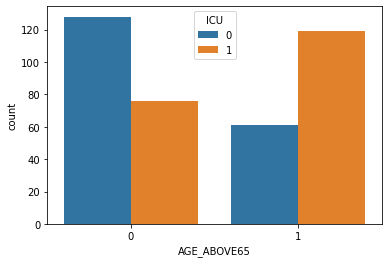

In [21]:
# AGE_ABOVE65
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=final_data)

## People with age above 65 have a higher chance of needing an ICU

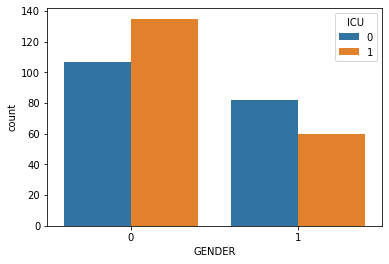

In [22]:
# GENDER
ax = sns.countplot(x="GENDER", hue="ICU", data=final_data)

## Gender 0 is at a slightly higher risk if considered standalone
## Although there may be other factors influencing the high icu count for it

## Visualize all the 3 features in a single plot


In [23]:
# create a temporary dataframe
icu_count = [final_data[ final_data['ICU']==0 ].shape[0],  final_data[ final_data['ICU']==1 ].shape[0] ]

gender_count = [ final_data[ (final_data['ICU']==0) & (final_data['GENDER']==0)].shape[0], 
                final_data[ (final_data['ICU']==1) & (final_data['GENDER']==0)].shape[0] ]

above65_count = [final_data[ (final_data['ICU']==0) & (final_data['AGE_ABOVE65']==1) ].shape[0],  
                 final_data[ (final_data['ICU']==1) & (final_data['AGE_ABOVE65']==1) ].shape[0] ]

plot_df = pd.DataFrame(list(zip(icu_count, gender_count, above65_count)), columns =['icu_count', 'gender_count','above65_count']) 

plot_df

,icu_count,gender_count,above65_count
0,189,107,61
1,195,135,119


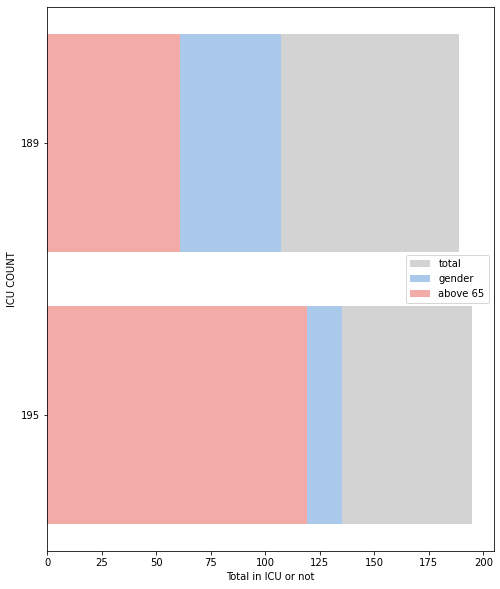

In [24]:
sns.set_color_codes("pastel")
fig = plt.subplots(figsize=(8,10))

ax = sns.barplot(x="icu_count", y="icu_count", data=plot_df, label="total", orient='h', color="lightgray")

sns.barplot(x="gender_count", y="icu_count", data=plot_df, label="gender", orient='h', color="b")

sns.barplot(x="above65_count", y="icu_count", data=plot_df, label="above 65" , orient='h', color="r")

ax.set(ylabel="ICU COUNT",xlabel="Total in ICU or not")
plt.legend()

# 189 is the count of patients NOT admitted in the ICU
# 194 is the count of patients admitted in the ICU

## Exploring Disease groupings


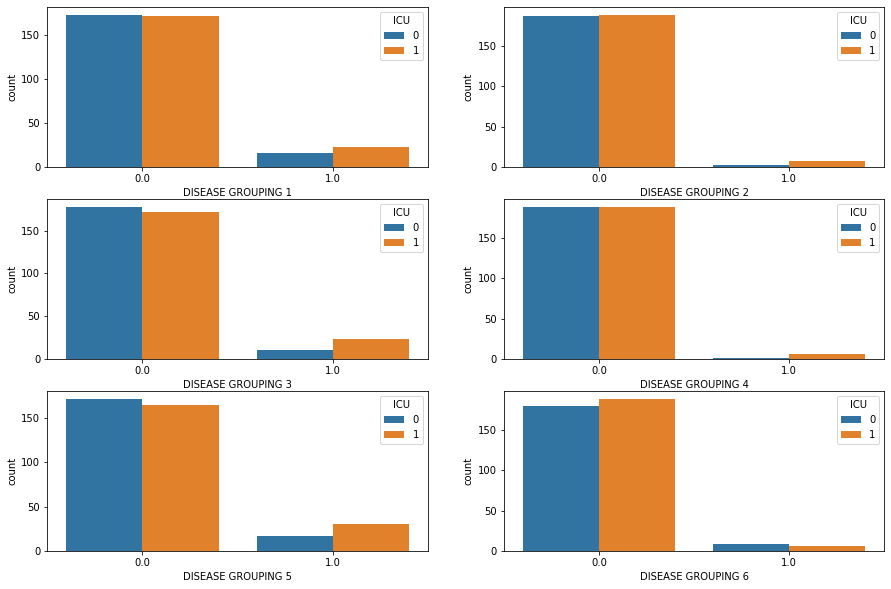

In [25]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))

col = 0

for i in range(len(disease_grp)):
    sns.countplot(x=disease_grp[i], hue="ICU", data=final_data, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

## HTN - Hypertension

<AxesSubplot:xlabel='HTN', ylabel='count'>

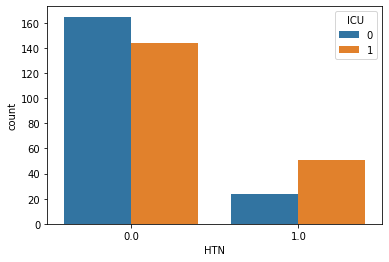

In [26]:
sns.countplot(x="HTN", hue="ICU", data=final_data)

## For hypertension - people with hypertension have a slightly higher chance of needing the ICU 
## However, it cannot be claimed with certainity as there is high imbalance

## IMMUNOCOMPROMISED


<AxesSubplot:xlabel='IMMUNOCOMPROMISED', ylabel='count'>

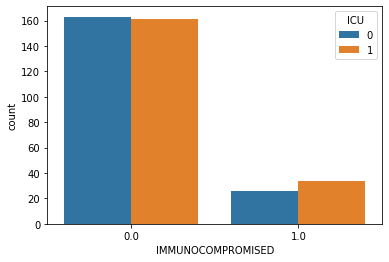

In [27]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=final_data)

## Immunocompromised or non-immunocompromised does not make a significant difference, the distribution 
## looks similar for both, we cannot make any claims as the people with some immunocompromised conditions
## are fewer than ones with such condition.

## OTHER

<AxesSubplot:xlabel='OTHER', ylabel='count'>

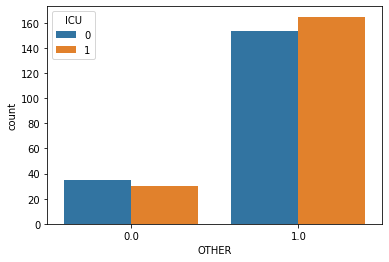

In [28]:
sns.countplot(x="OTHER", hue="ICU", data=final_data)

## Analysis for other vital signs


In [29]:
vital_signs = final_data.columns[13:]
vital_signs_df = final_data[vital_signs]

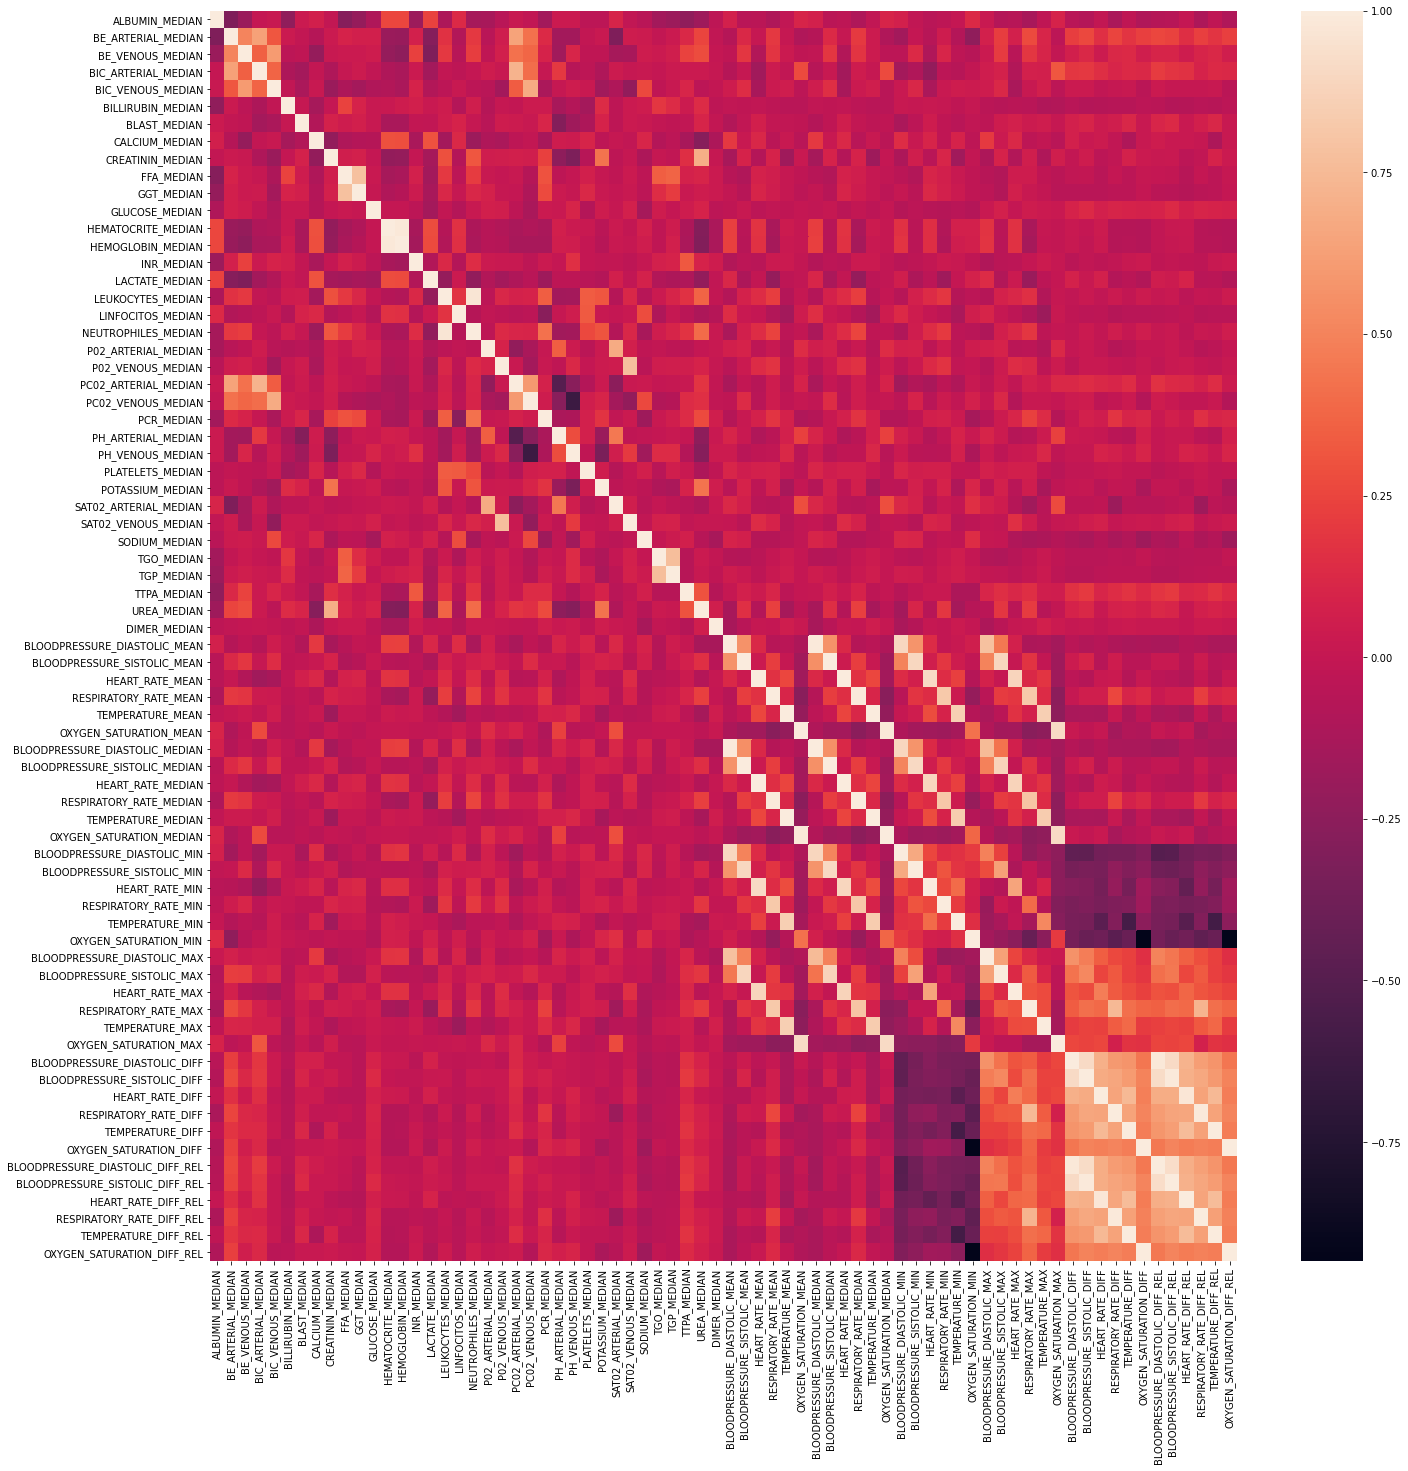

In [30]:
f,ax = plt.subplots(figsize=(23,23))
sns.heatmap(vital_signs_df.drop(columns=['ICU']).corr())
plt.show()

In [31]:
rows_list = []
for f in vital_signs:
    v1 = vital_signs_df[ vital_signs_df['ICU']==1 ][f].var()
    v0 = vital_signs_df[ vital_signs_df['ICU']==0 ][f].var()
    dict1 = {
        'feature' : f,
        'icu' : v1,
        'non-icu' : v0
    }
    rows_list.append(dict1)
    
var_vital_signs = pd.DataFrame(rows_list)

In [32]:
var_vital_signs


,feature,icu,non-icu
0,ALBUMIN_MEDIAN,0.037853,0.008480
1,BE_ARTERIAL_MEDIAN,0.012658,0.000030
2,BE_VENOUS_MEDIAN,0.022055,0.006649
3,BIC_ARTERIAL_MEDIAN,0.006721,0.000001
4,BIC_VENOUS_MEDIAN,0.016308,0.002710
5,BILLIRUBIN_MEDIAN,0.006228,0.000533
6,BLAST_MEDIAN,0.020326,0.000000
7,CALCIUM_MEDIAN,0.013929,0.003506
8,CREATININ_MEDIAN,0.031953,0.000916
9,FFA_MEDIAN,0.030258,0.015622


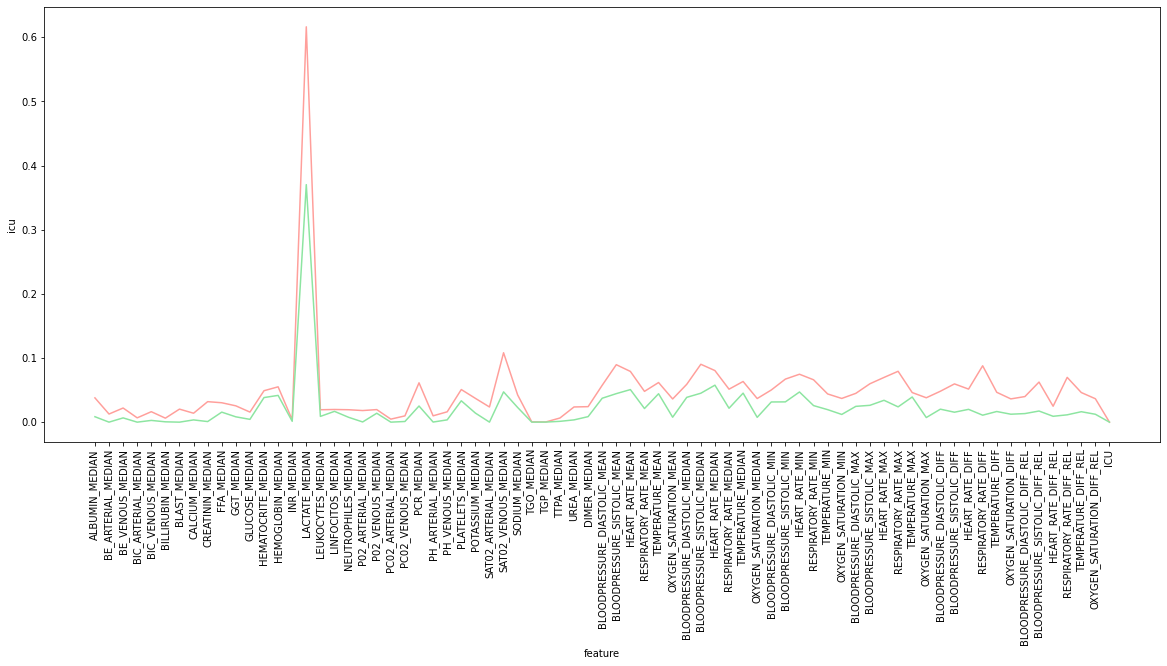

In [33]:
fig = plt.subplots(figsize=(20,8))
ax = sns.lineplot(data=var_vital_signs, x="feature", y="icu", color='r')
sns.lineplot(data=var_vital_signs, x="feature", y="non-icu", color='g')
plt.xticks(rotation=90)
plt.show()

## We can clearly see that the variance of vital signs for patients admitted in the icu varies drastically compared to that of the ones
## not admitted to the ICU


## For example - ALBUMIN_MEDIAN

<AxesSubplot:xlabel='GGT_MEDIAN', ylabel='Density'>

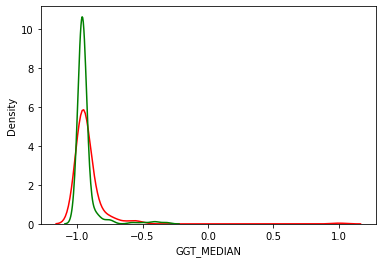

In [34]:
sns.kdeplot(final_data[ final_data['ICU']==1 ]['GGT_MEDIAN'],color = "red")
sns.kdeplot(final_data[ final_data['ICU']==0 ]['GGT_MEDIAN'],color = "green")

## From the kde plot we can see the spread (variance) of the red plot (ICU) is more than the green one.

## target variable balance


<AxesSubplot:xlabel='ICU', ylabel='count'>

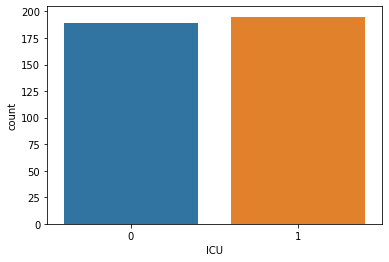

In [35]:
sns.countplot(x="ICU", data=final_data)

## We have a balanced dataset, because the number of entries/rows/patients admitted to ICU and the number of entries not admitte to ICU 
## is almost equal.
## Thus no imbalance exists for the target variable.

## Exporting the preprocessed data for ML model training

In [36]:
final_data.to_csv('Covid_ICU_preprocessed.csv')

In [38]:
final_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.803922,-0.750000,-0.885522,-0.595604,-0.419448,-0.681860,-0.792832,-0.752732,-0.887561,1
15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.784314,-0.682540,-0.723906,-0.769565,-0.685906,-0.689698,-0.776583,-0.682540,-0.724145,0
20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.901961,-0.761905,-0.959596,-0.884058,-0.826611,-0.839287,-0.896057,-0.766042,-0.960291,0
